## SVM Checker

In [15]:
%matplotlib inline

import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import itertools




def example(num_samples=10, num_features=2, grid_size=20, kernelType = 'linear'):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    if (kernelType == "linear"):
        trainer = svm.SVMTrainer(svm.Kernel.linear())
    elif(kernelType == "gaussian"):
        trainer = svm.SVMTrainer(svm.Kernel.gaussian(1.0))
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
    Z = np.array(result).reshape(xx.shape)
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 0.95563042 -0.03358183]
 [ 1.63867792 -0.89702541]
 [-1.97488863  1.94045959]
 [ 0.26414421  0.49815393]
 [-0.52676027 -0.05430299]
 [-0.61999803  0.89672963]
 [ 0.21319291 -0.38258814]
 [-1.07549196 -1.16715178]
 [ 0.96042188  0.82103778]
 [-0.49775156  0.43092585]]
     pcost       dcost       gap    pres   dres
 0: -4.2075e+00 -1.0105e+01  3e+01  4e+00  2e+00
 1: -1.2660e+01 -1.6194e+01  9e+00  2e+00  8e-01
 2: -3.5129e+01 -3.9280e+01  1e+01  1e+00  6e-01
 3: -3.7304e+01 -4.0650e+01  8e+00  5e-01  3e-01
 4: -3.5292e+01 -3.5534e+01  5e-01  2e-02  1e-02
 5: -3.5189e+01 -3.5191e+01  5e-03  2e-04  1e-04
 6: -3.5188e+01 -3.5188e+01  5e-05  2e-06  1e-06
 7: -3.5188e+01 -3.5188e+01  5e-07  2e-08  1e-08
Optimal solution found.


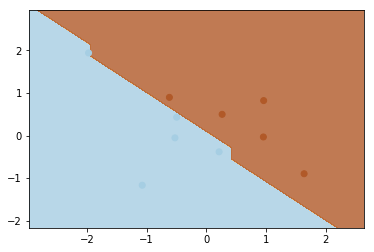

In [17]:
example(kernelType = 'linear')